<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1">Imports</a></span></li><li><span><a href="#Metronome" data-toc-modified-id="Metronome-2">Metronome</a></span></li><li><span><a href="#Playback-Example" data-toc-modified-id="Playback-Example-3">Playback Example</a></span></li><li><span><a href="#Recording-without-playing" data-toc-modified-id="Recording-without-playing-4">Recording without playing</a></span></li><li><span><a href="#Generate-5kHz-Sinusoid" data-toc-modified-id="Generate-5kHz-Sinusoid-5">Generate 5kHz Sinusoid</a></span></li><li><span><a href="#Guess-a-note" data-toc-modified-id="Guess-a-note-6">Guess a note</a></span></li></ul></div>

# Imports

In [1]:
import soundcard as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

%config InlineBackend.figure_format = "retina"
from IPython.display import HTML

In [2]:
# get a list of all speakers:
speakers = sc.all_speakers()
# get a list of all microphones:
mics = sc.all_microphones()

print('available speakers:\n')
for speaker in speakers:
    print(speaker)
    
print('available microphones:\n')
for mic in mics:
    print(mic)

available speakers:

<Speaker AirBeamTV Audio (2 channels)>
<Speaker Built-in Output (2 channels)>
<Speaker Scarlett Solo USB (2 channels)>
available microphones:

<Microphone AirBeamTV Audio (2 channels)>
<Microphone Built-in Microphone (2 channels)>
<Microphone Scarlett Solo USB (2 channels)>


Choose AUX output and scarlet input

In [11]:
my_speaker = sc.get_speaker('Built-in Output')
my_mic = sc.get_microphone('Scarlett')
my_speaker = sc.get_speaker('Scarlett')

# Metronome

In [9]:
BPM = 180 #beats per minute
BPS = BPM/60 #betas per second
SBB = 1/BPS #seconds between beats
cmd = "echo -n '\a';sleep "+str(SBB)+";"
cmd *= 8
print(cmd)
beep = os.system(cmd)

echo -n '';sleep 0.3333333333333333;echo -n '';sleep 0.3333333333333333;echo -n '';sleep 0.3333333333333333;echo -n '';sleep 0.3333333333333333;echo -n '';sleep 0.3333333333333333;echo -n '';sleep 0.3333333333333333;echo -n '';sleep 0.3333333333333333;echo -n '';sleep 0.3333333333333333;


# Playback Example

In [5]:
print('Input: %s \nOutput %s'%(str(my_mic), str(my_speaker)))
LENGTH = 100
ALL_DATA = np.zeros((0,2))

with my_mic.recorder(samplerate=48000) as mic, \
      my_speaker.player(samplerate=48000) as sp:
    for _ in range(LENGTH):
        data = mic.record(numframes=1024)
        ALL_DATA = np.concatenate([data, ALL_DATA])
        sp.play(data)
        
print('data.shape: %s'% str(ALL_DATA.shape))

Input: <Microphone Scarlett Solo USB (2 channels)> 
Output <Speaker Built-in Output (2 channels)>
data.shape: (121234, 2)


# Recording without playing

In [8]:
SECONDS = 4 
SAMPLE_RATE = 48000 
NUM_FRAMES = SAMPLE_RATE*SECONDS

# record and play back one second of audio:
print('Input: %s \nOutput %s'%(str(my_mic), str(my_speaker)))
data = my_mic.record(samplerate=SAMPLE_RATE, numframes=NUM_FRAMES)

Input: <Microphone Scarlett Solo USB (2 channels)> 
Output <Speaker Built-in Output (2 channels)>


In [9]:
my_speaker.play(data/np.max(data), samplerate=SAMPLE_RATE)

In [10]:
AUDIO = pd.DataFrame(dict(INDEX = list(range(0, data.shape[0])),
            LEFT_AUDIO = data[:,0],
            RIGHT_AUDIO = data[:,1]))
AUDIO.head()

,INDEX,LEFT_AUDIO,RIGHT_AUDIO
0,0,-0.000052,-0.000038
1,1,-0.000025,-0.000042
2,2,-0.000046,-0.000028
3,3,-0.000059,-0.000030
4,4,-0.000049,-0.000023


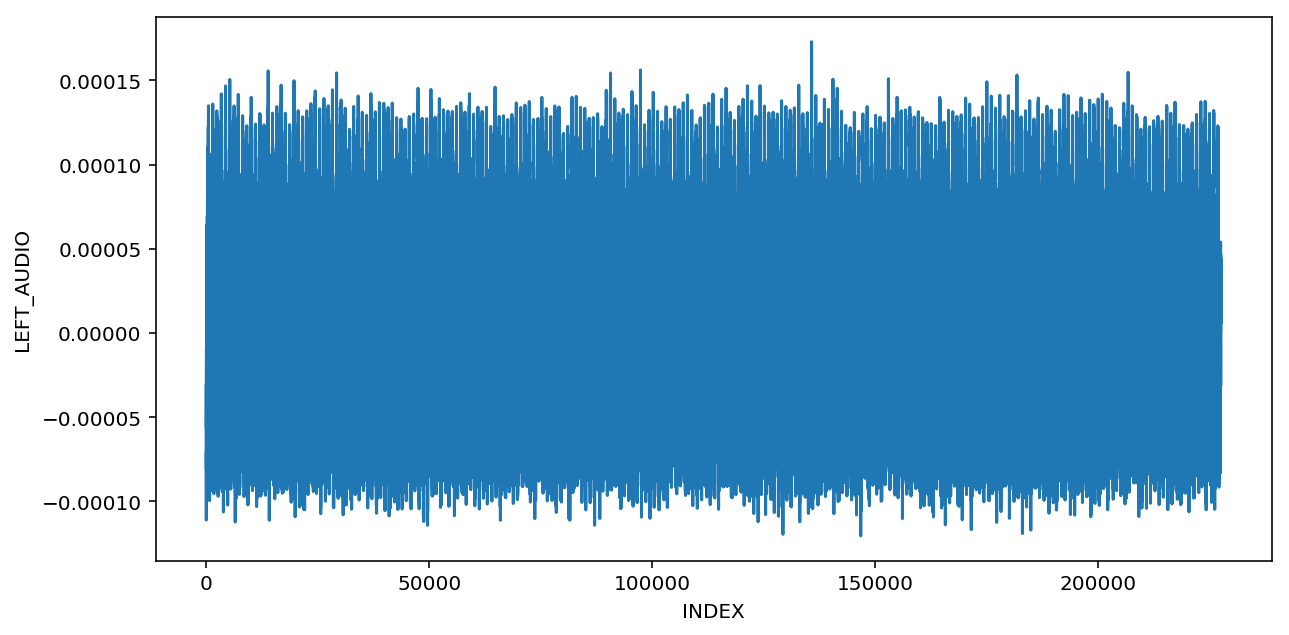

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(data=AUDIO, 
            x='INDEX',
            y='LEFT_AUDIO')

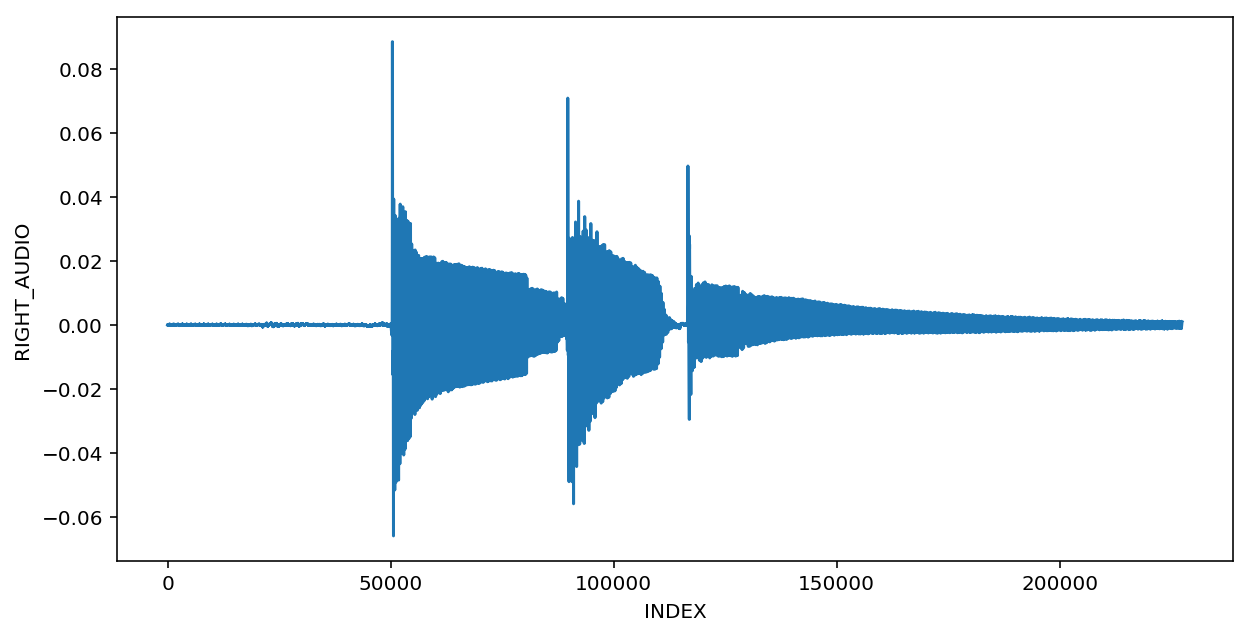

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data=AUDIO, 
            x='INDEX',
            y='RIGHT_AUDIO')

# Generate 5kHz Sinusoid

Text(5000,0.5,' freq: 5000.00Hz')

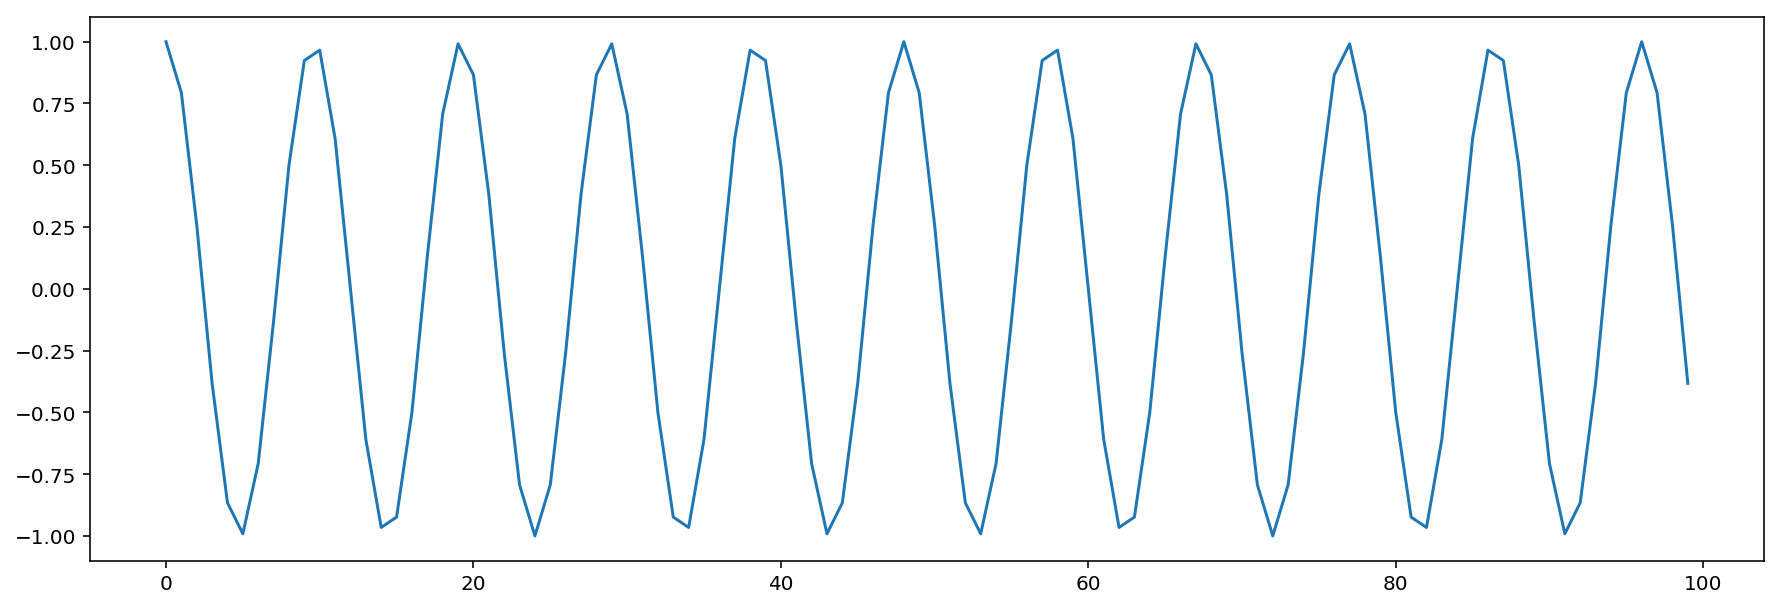

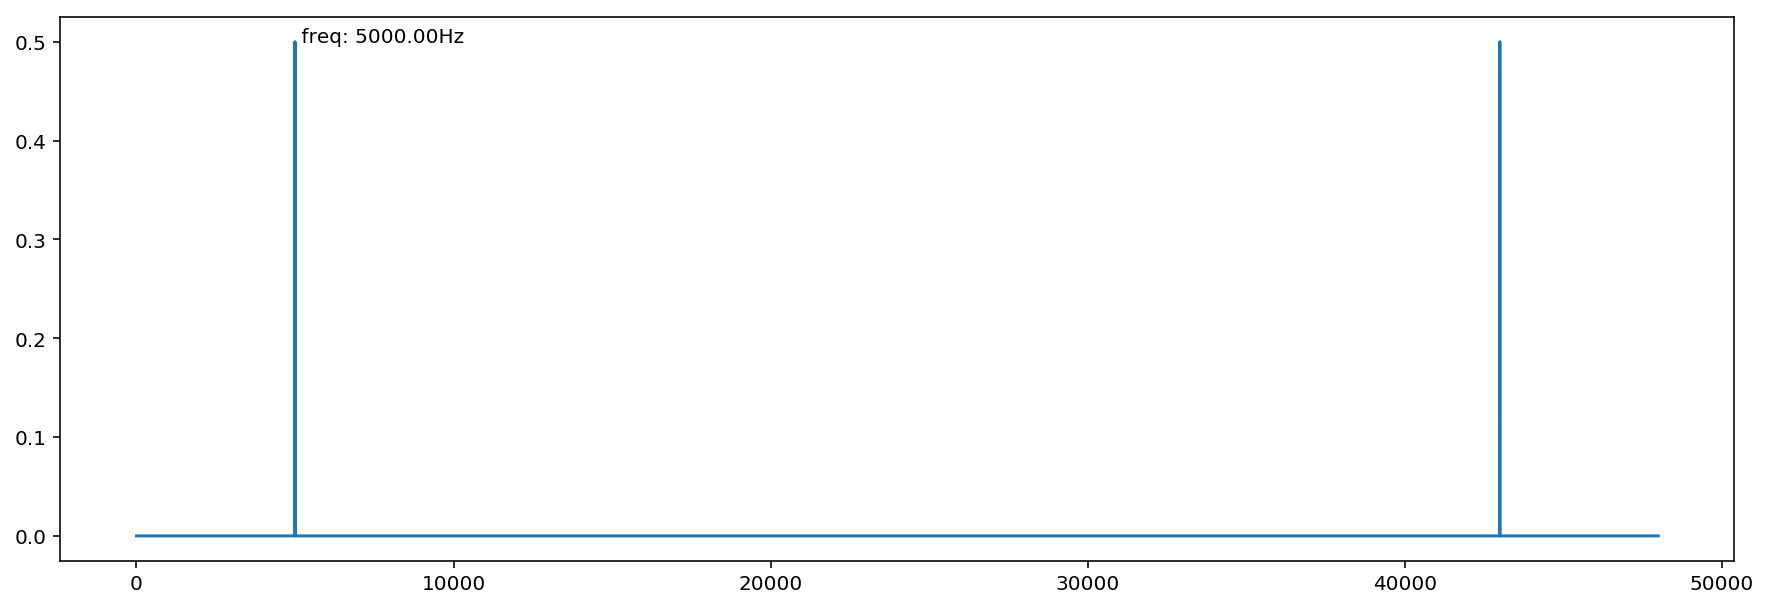

In [11]:
# Sampling rate
fs = 48000 # Hz

# Time is from 0 to 1 seconds, but leave off the endpoint, so that 1.0 seconds is the first sample of the *next* chunk
length = 1 # second
N = fs * length
t = np.linspace(0, length, num = N, endpoint = False)

# Generate a sinusoid at frequency f
f = 5000 # Hz
a = np.cos(2 * np.pi * f * t)
plt.figure(figsize=(15,5))
plt.plot(a[0:100])

# Use FFT to get the amplitude of the spectrum
ampl = 1/N * abs(np.fft.fft(a))
plt.figure(figsize=(15,5))
plt.plot(ampl)
plt.text(np.argmax(ampl), ampl[np.argmax(ampl)], ' freq: %.2fHz'%np.argmax(ampl))

# Guess a note

In [2]:
NOTES = pd.read_csv('./notes.csv').reset_index()
NOTES.head()

,index,Note,Frequency_Hz,Wavelength_cm
0,0,C0,16.35,2109.89
1,1,C#0/Db0,17.32,1991.47
2,2,D0,18.35,1879.69
3,3,D#0/Eb0,19.45,1774.20
4,4,E0,20.60,1674.62


In [3]:
def play_metronome():
    BPM = 100 #beats per minute
    BPS = BPM/60 #betas per second
    SBB = 1/BPS #seconds between beats
    cmd = "echo -n '\a';sleep "+str(SBB)+";"
    cmd *= 4
    beep = os.system(cmd)
    cmd = "echo -n '\a';sleep "+str(SBB)+";"
    cmd *= 2
    beep = os.system(cmd)  

def record(mic, seconds=6, sample_rate=48000):
    """
    function that records using mic 
    
    returns
    """
    # record and play back one second of audio:
    num_frames = sample_rate*seconds
    data = mic.record(samplerate=sample_rate, numframes=num_frames)
    audio = pd.DataFrame(dict(index = list(range(0, data.shape[0])),
                left = data[:,0],
                right = data[:,1]), dtype=np.float128)
    return(audio)

def play(speaker, audio, sample_rate=48000):
    x = audio[['left', 'right']].values
    x_normed = x / x.max(axis=0)
    speaker.play(x_normed, samplerate=sample_rate)
    
def play_ch(speaker, audio, sample_rate=48000):
    speaker.play(audio/audio.max(), samplerate=sample_rate)

def get_fft(audio_channel, seconds=6, sample_rate=48000, cut_off_freq=22000):
    audio_channel = audio_channel.astype(float).values
    N = sample_rate * seconds

    # Use FFT to get the amplitude of the spectrum
    ampl = 1/N * abs(np.fft.fft(audio_channel))
    ampl = ampl[1:cut_off_freq]

    return(ampl)

def get_note(y_fft, notes, offset=2):
    """
    Function that identifies the note played
    
    offset is needed for calibration
    """
    return(pd.DataFrame(notes.iloc[notes.\
                            Frequency_Hz.\
                            apply(lambda x: \
                                  abs(x-y_fft.argmax())).\
                            values.\
                            argmin()+offset]).\
    reset_index().\
          rename(columns={'index':'key', 2:'value'}))

def save_plots(audio, y_fft,
               file_name='file_name', 
               annotate=False, 
               file_type='jpg',
               figsize=(15,7)):
    """
    function that saves 3 plots
        audio.left
        audio.right
        fft
    as 
        <file_name>_left.<file_type>
        <file_name>_right.<file_type>
        <file_name>_fft.<file_type>   
    """
    max_freq = y_fft.argmax()
    
    audio_right = plt.figure(figsize=figsize)
    plt.plot(audio.right)
    audio_right.savefig(file_name+'_right.'+file_type)
    plt.show()
    
    audio_left = plt.figure(figsize=figsize)
    plt.plot(audio.left)
    audio_left.savefig(file_name+'_left.'+file_type)
    plt.show()

    fft = plt.figure(figsize=figsize)
    plt.plot(y_fft)
    if annotate:
        plt.text(max_freq, y_fft[max_freq], ' freq: %.2f Hz'%(max_freq))
        for row in get_note(y_fft, NOTES).iterrows():
                 plt.text(max_freq, \
                          y_fft[max_freq] \
                     * (0.9\
                      - row[0]\
                      / 10), ' %s: %s'%(str(row[1][0]), str(row[1][1])))
    fft.savefig(file_name+'_fft.'+file_type)
    plt.show()
    
    #plt.xscale('log')
    #plt.xlim((100, CUT_OFF))


In [4]:
def record(mic, seconds=6, sample_rate=48000):
    """
    function that records using mic 
    
    returns
    """
    # record and play back one second of audio:
    num_frames = sample_rate*seconds
    data = mic.record(samplerate=sample_rate, numframes=num_frames)
    audio = pd.DataFrame(dict(index = list(range(0, data.shape[0])),
                left = data[:,0],
                right = data[:,1]), dtype=np.float128)
    return(audio)

In [5]:
def play(speaker, audio, sample_rate=48000):
    x = audio[['left', 'right']].values
    x_normed = x / x.max(axis=0)
    speaker.play(x_normed, samplerate=sample_rate)
    
def play_ch(speaker, audio, sample_rate=48000):
    speaker.play(audio/audio.max(), samplerate=sample_rate)

In [6]:
def get_fft(audio_channel, seconds=6, sample_rate=48000, cut_off_freq=22000):
    audio_channel = audio_channel.astype(float).values
    N = sample_rate * seconds

    # Use FFT to get the amplitude of the spectrum
    ampl = 1/N * abs(np.fft.fft(audio_channel))
    ampl = ampl[1:cut_off_freq]

    return(ampl)

In [14]:
def get_note(y_fft, notes, offset=2):
    """
    Function that identifies the note played
    
    offset is needed for calibration
    """
    return(pd.DataFrame(notes.iloc[notes.\
                            Frequency_Hz.\
                            apply(lambda x: \
                                  abs(x-y_fft.argmax())).\
                            values.\
                            argmin()+offset]).\
    reset_index().\
          rename(columns={'index':'key', 2:'value'}))

In [46]:
def save_plots(audio, y_fft,
               file_name='file_name', 
               annotate=False, 
               file_type='jpg',
               figsize=(15,7)):
    """
    function that saves 3 plots
        audio.left
        audio.right
        fft
    as 
        <file_name>_left.<file_type>
        <file_name>_right.<file_type>
        <file_name>_fft.<file_type>   
    """
    max_freq = y_fft.argmax()
    
    audio_right = plt.figure(figsize=figsize)
    plt.plot(audio.right)
    audio_right.savefig(file_name+'_right.'+file_type)
    plt.show()
    
    audio_left = plt.figure(figsize=figsize)
    plt.plot(audio.left)
    audio_left.savefig(file_name+'_left.'+file_type)
    plt.show()

    fft = plt.figure(figsize=figsize)
    plt.plot(y_fft)
    if annotate:
        plt.text(max_freq, y_fft[max_freq], ' freq: %.2f Hz'%(max_freq))
        for row in get_note(y_fft, NOTES).iterrows():
                 plt.text(max_freq, \
                          y_fft[max_freq] \
                     * (0.9\
                      - row[0]\
                      / 10), ' %s: %s'%(str(row[1][0]), str(row[1][1])))
    fft.savefig(file_name+'_fft.'+file_type)
    plt.show()
    
    #plt.xscale('log')
    #plt.xlim((100, CUT_OFF))


In [ ]:
MICROPHONE = sc.get_microphone('Scarlett')
SPEAKER = sc.get_speaker('Scarlett')


In [ ]:
filename = 'E3'
audio = record(MICROPHONE)

In [ ]:
play_ch(SPEAKER, audio.right)

In [ ]:
y_fft = get_fft(audio.right)
save_plots(audio, y_fft, file_name='notes/'+filename, annotate=True, figsize=(10, 3))
get_note(y_fft, NOTES)